In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
os.chdir("C:/Users/muham/Desktop/YOLOMODEL1")
Coin = "BNB"

In [2]:
ClosePrices = pd.read_excel(f"1_PrepareDataset/{Coin}DailyWithTech.xlsx", index_col="Date")[["Close"]]
ClosePrices.head(2)

,Close
Date,
2017-12-06,2.58769
2017-12-07,2.77995


In [3]:
ClosePrices.tail(2)

,Close
Date,
2024-08-11,503.804535
2024-08-12,518.536133


In [4]:
len(ClosePrices)

2442

In [5]:
def calculate_average_percentage_change(data):
    percentage_changes = np.diff(data) / data[:-1] * 100 
    average_percentage_change = np.mean(percentage_changes)
    
    return average_percentage_change

In [6]:
def calculate_reference_slopes(prices, window=30, future_days=4):

    slopes = []
    for i in range(len(prices) - window - future_days+1):

        data = prices[i + window-1: i + window + future_days]
        slope = calculate_average_percentage_change(data)
        slopes.append(slope)
        
    sorted_slopes = sorted(slopes)
    sorted_slopes = np.array(sorted_slopes)

    if Coin == "BNB":
        slope_2n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.40)+1][-1]   
        slope_3n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.60)+1][-1]
    
    elif Coin == "BTC":
        slope_2n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.40)+1][-1]
        slope_3n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.60)+1][-1]

    elif Coin == "ETH":
        slope_2n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.40)+1][-1]
        slope_3n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.60)+1][-1]
    
    elif Coin == "XRP":
        slope_2n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.40)+1][-1]
        slope_3n_5 = sorted_slopes[:int(len(sorted_slopes) * 0.60)+1][-1]


    return slope_2n_5, slope_3n_5, sorted_slopes



x,y,z = calculate_reference_slopes(ClosePrices.Close)
print(calculate_reference_slopes(ClosePrices.Close.values))



(-0.24988992478374883, 0.5418521795422137, array([-11.12988045, -10.77767377, -10.6194028 , ...,  23.07779834,
        23.58052105,  28.93417739]))


In [7]:
BNBClosePrices = pd.read_excel(f"1_PrepareDataset/BNBDailyWithTech.xlsx", index_col="Date")[["Close"]]
BTCClosePrices = pd.read_excel(f"1_PrepareDataset/BTCDailyWithTech.xlsx", index_col="Date")[["Close"]]
ETHClosePrices = pd.read_excel(f"1_PrepareDataset/ETHDailyWithTech.xlsx", index_col="Date")[["Close"]]
XRPClosePrices = pd.read_excel(f"1_PrepareDataset/XRPDailyWithTech.xlsx", index_col="Date")[["Close"]]

BNB: -0.25 / 0.54
BTC: -0.12 / 0.46
ETH: -0.24 / 0.54
XRP: -0.42 / 0.3


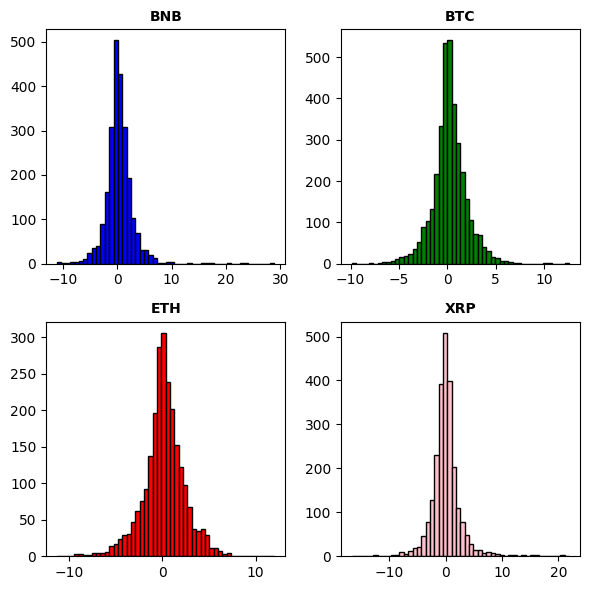

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x1,y1,z1 = calculate_reference_slopes(BNBClosePrices.Close)
x2,y2,z2 = calculate_reference_slopes(BTCClosePrices.Close)
x3,y3,z3 = calculate_reference_slopes(ETHClosePrices.Close)
x4,y4,z4 = calculate_reference_slopes(XRPClosePrices.Close)

print(f"BNB: {round(x1,2)} / {round(y1,2)}")
print(f"BTC: {round(x2,2)} / {round(y2,2)}")
print(f"ETH: {round(x3,2)} / {round(y3,2)}")
print(f"XRP: {round(x4,2)} / {round(y4,2)}")

fig, ax = plt.subplots(2,2, figsize = (6,6))

ax[0,0].hist(z1, bins=50, edgecolor='black', color = "blue");
ax[0,0].set_title("BNB", fontweight = "bold", fontsize = 10)

ax[0,1].hist(z2, bins=50, edgecolor='black', color = "green");
ax[0,1].set_title("BTC", fontweight = "bold", fontsize = 10)

ax[1,0].hist(z3, bins=50, edgecolor='black', color = "red");
ax[1,0].set_title("ETH", fontweight = "bold", fontsize = 10)

ax[1,1].hist(z4, bins=50, edgecolor='black', color = "pink");
ax[1,1].set_title("XRP", fontweight = "bold", fontsize = 10)

plt.tight_layout()
plt.savefig("2_SplitData/ReferenceReturns.png", dpi = 250)

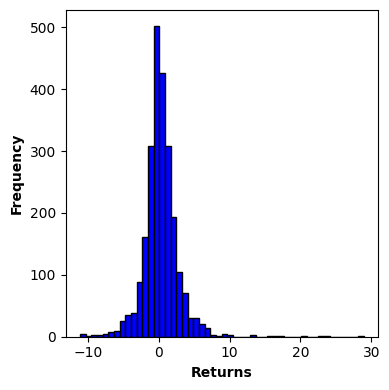

In [9]:
fig, ax = plt.subplots(figsize = (4,4))

ax.hist(z1, bins=50, edgecolor='black', color = "blue");
ax.set_ylabel("Frequency", fontweight = "bold")
ax.set_xlabel("Returns", fontweight = "bold")
plt.tight_layout()
plt.savefig("2_SplitData/BNB_Reference_Return.png", dpi = 250)

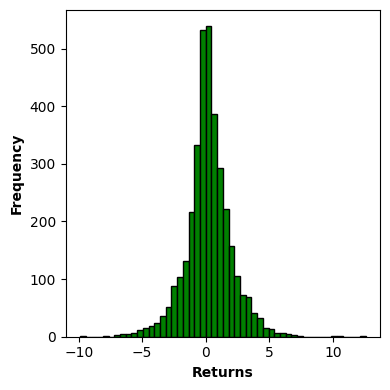

In [10]:
fig, ax = plt.subplots(figsize = (4,4))

ax.hist(z2, bins=50, edgecolor='black', color = "green");
ax.set_ylabel("Frequency", fontweight = "bold")
ax.set_xlabel("Returns", fontweight = "bold")
plt.tight_layout()
plt.savefig("2_SplitData/BTC_Reference_Return.png", dpi = 250)

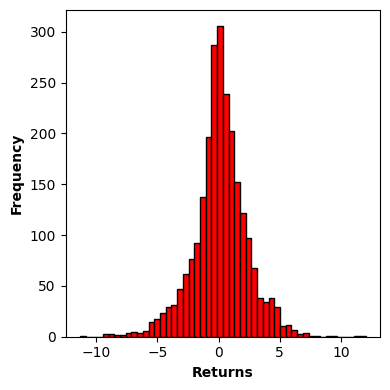

In [11]:
fig, ax = plt.subplots(figsize = (4,4))

ax.hist(z3, bins=50, edgecolor='black', color = "red");
ax.set_ylabel("Frequency", fontweight = "bold")
ax.set_xlabel("Returns", fontweight = "bold")
plt.tight_layout()
plt.savefig("2_SplitData/ETH_Reference_Return.png", dpi = 250)

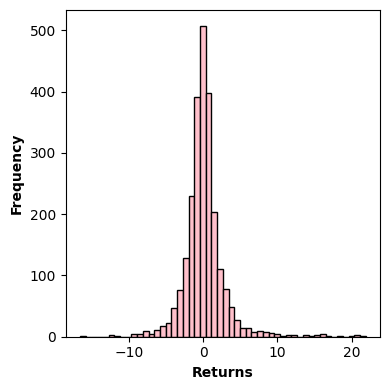

In [12]:
fig, ax = plt.subplots(figsize = (4,4))

ax.hist(z4, bins=50, edgecolor='black', color = "pink");
ax.set_ylabel("Frequency", fontweight = "bold")
ax.set_xlabel("Returns", fontweight = "bold")
plt.tight_layout()
plt.savefig("2_SplitData/XRP_Reference_Return.png", dpi = 250)

In [13]:
def generateLabels(ClosePrice, WindowSize = 30, CurrentSlopeDay = 1):

    df = pd.DataFrame(columns=["Close", "label", "range", "id", "labelId"])
    df["Close"] = ClosePrice

    slope_2n_5, slope_3n_5, _= calculate_reference_slopes(ClosePrice)
    id = WindowSize
    labelId = 0

    for i in range(len(ClosePrice)-WindowSize-CurrentSlopeDay):

        data = ClosePrice[i + WindowSize-1: i + WindowSize + CurrentSlopeDay]
        currentslope = calculate_average_percentage_change(data)

        label = None

        if currentslope >= slope_3n_5:
            label = "buy"
        elif slope_2n_5 < currentslope < slope_3n_5:
            label = "hold"
        elif currentslope <= slope_2n_5:
            label = "sell"

        df.loc[i+WindowSize, "label"] = label
        df.loc[i+WindowSize, "range"] = f"{i}:{i+WindowSize}"
        df.loc[i+WindowSize, "id"] = id
        df.loc[i+WindowSize, "labelId"] = labelId
        labelId+=1
        id+=1

    print(i)
    df.index = ClosePrices.index
    df.to_excel(f"{Coin}_Labels.xlsx")

    return df

LabelDf = generateLabels(ClosePrices.Close.values)
LabelDf.iloc[28:35, :]


2410


,Close,label,range,id,labelId
Date,,,,,
2018-01-03,9.535880,NaN,NaN,NaN,NaN
2018-01-04,9.213990,NaN,NaN,NaN,NaN
2018-01-05,14.917200,buy,0:30,30,0
2018-01-06,22.759800,buy,1:31,31,1
2018-01-07,18.656799,sell,2:32,32,2
2018-01-08,18.260900,sell,3:33,33,3
2018-01-09,17.411800,sell,4:34,34,4


In [14]:
LabelDf.tail()

,Close,label,range,id,labelId
Date,,,,,
2024-08-08,517.337524,buy,2407:2437,2437,2407
2024-08-09,509.182709,sell,2408:2438,2438,2408
2024-08-10,523.317627,buy,2409:2439,2439,2409
2024-08-11,503.804535,sell,2410:2440,2440,2410
2024-08-12,518.536133,NaN,NaN,NaN,NaN


In [15]:
LabelDf["label"].value_counts()

sell    1075
buy     1041
hold     295
Name: label, dtype: int64

In [16]:
LabelDf["label"].value_counts("d")

sell    0.445873
buy     0.431771
hold    0.122356
Name: label, dtype: float64

In [17]:
LabelDf["label"].value_counts().sum()

2411

In [18]:
coins = ["BNB", "BTC", "ETH", "XRP"]
images = ["Bar","Candle", "GAF", "Heatmap", "Multi"]





r = "python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BNB/Bar --dest 4_SplitImages/Train/BNB_B_Train" 



for c in coins:
    for i in images:

        exp = f"python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/{c}/{i} --dest 4_SplitImages/Train/{c}_{i[0]}_Train" 
        print(exp)


python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BNB/Bar --dest 4_SplitImages/Train/BNB_B_Train
python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BNB/Candle --dest 4_SplitImages/Train/BNB_C_Train
python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BNB/GAF --dest 4_SplitImages/Train/BNB_G_Train
python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BNB/Heatmap --dest 4_SplitImages/Train/BNB_H_Train
python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BNB/Multi --dest 4_SplitImages/Train/BNB_M_Train
python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BTC/Bar --dest 4_SplitImages/Train/BTC_B_Train
python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BTC/Candle --dest 4_SplitImages/Train/BTC_C_Train
python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BTC/GAF --dest 4_SplitImages/Train/BTC_G_Train
python 4_SplitImages/SplitDataClasses.py --folder 3_GenerateLabel/BTC/Heatmap --dest